# Organizando uma eleição
(créditos ao professor Rafael)

O último ano foi extremamente desafiador para você. Além de estarmos vivendo uma pandemia que aumentou nossa preocupação com a nossa própria vida e com nossos entes queridos e estarmos obrigados a passar mais tempo em casa para garantir nossa segurança, você se matriculou em um curso de programação e ciência de dados para mudar de rumo em sua carreira!

O _timing_ pareceu ideal: mais tempo em casa, mais tempo para estudar. Porém, você esbarrou em algumas dificuldades. O condomínio está em reforma, e você passa o dia ao som de marretadas no piso. Durante a noite, no horário da sua aula online, seus vizinhos - um casal passando por dificuldades na relação - costumam discutir em voz alta. A discussão deles frequentemente acorda o bebê do outro vizinho e todos os cachorros do andar no prédio. Deixar para estudar no final de semana não ajuda, pois o filho adolescente da família do apartamento logo acima do seu costuma trazer os colegas de banda para ensaiar. 

A situação se tornou insustentável, e o síndico - que é o mesmo senhorzinho desde que você se mudou para esse condomínio, há mais de 10 anos - não toma atitudes e não gosta de ser perturbado. Chegou a hora de organizar uma eleição para um novo síndico, e você tomou a iniciativa de montar um sistema eletrônico para auxiliar na votação.

## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

In [1]:
class Morador:
    '''
    Classe Morador que cria um morador(self).
    '''
    def __init__(self, nome, apartamento, cpf):
        '''
        Método construtor da classe Morador.

        Parâmetros
        ----------
        nome : str
            Nome do self(morador), possibilidade por input ou declarado.
        apartamento : int
            Número do apartamento do self(morador), possibilidade por input ou declarado.
        cpf : int
            CPF do self(morador).
        '''
        
        # atributos do método construtor
        self.nome = nome
        self.apartamento = apartamento
        self.cpf=cpf
    
    def __repr__(self): #Método para representação do objeto da classe Morador
        return f'Nome: {self.nome}\nApartamento: {self.apartamento}\nCPF: {self.cpf}'

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [2]:
class Candidato(Morador):
    def __init__(self,nome,apartamento,cpf):
        super().__init__(nome,apartamento,cpf)
        '''
        Construtor

        Parametros
        ----------
        nome : str
            O nome do candidato, herdado da classe Morador
        apartamento : int
            O apartamento do candidato, herdado da classe Morador
        cpf : int
            O CPF do candidato, herdado da classe Morador
        votos : int
            O número de votos que o candidato recebeu
        identificador : int
            O número de identificação do candidato
        '''
        self.votos=0
        self.identificador=0
    
    def __repr__(self):
        return f"{self.nome}"
    
    def define_identificador(self,numero_urna):
        '''
        Método para definir o número de identificação do usuário

        Parametros
        ----------
        numero_urna : int
            Número de identificação, a ser dado pelo objeto da classe Urna

        '''
        self.identificador=numero_urna

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [3]:
class Apartamento:
    def __init__(self, numero_ap):
        '''
        Construtor

        Parametros
        ----------
        numero_ap : int
            O número do apartamento a ser cadastrado
        registrou_voto : bool
            Verificação se algum morador do apartamento votou
        lista_moradores : list
            Lista com os moradores (Objetos da classe Morador) do apartamento
        '''
        
        self.numero_ap = numero_ap
        self.__registrou_voto = False 
        self.lista_moradores=[]
        

    def mostra_moradores(self):
        for i in range (len(self.lista_moradores)):
            print (self.lista_moradores[i])               
            
    def __repr__(self):
        return f"Apartamento {self.numero_ap} - Moradores: {self.lista_moradores}"
        
    def incluir_novo_morador(self, novo_morador): 
        '''
        Método para incluir um morador na lista de moradores

        Parametros
        ----------
        novo_morador : Morador
            Objeto da classe Morador a ser incluido no apartamento
        '''
        self.lista_moradores.append(novo_morador)

    def registra_voto(self):
        self.__registrou_voto=True

    @property
    def registrou_voto(self):
        return self.__registrou_voto


### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [4]:
class Urna:
    numero_candidatos=0
    def __init__(self):
        '''
        Construtor

        Parametros
        ----------
        lista_apartamentos : list
            Lista dos apartamentos participantes na votação
        lista_ap_votantes : list
            Lista dos apartamentos que ja votaram
        lista_candidatos : dict
            Dicionário dos candidatos participantes {identificador:objeto}
        lista_candidatos_votos : dict
            Dicionário dos candidatos e respectivos votos {objeto:votos}
        '''
        self.lista_apartamentos=[]
        self.lista_ap_votantes=[]
        self.lista_candidatos={}
        self.lista_candidatos_votos={}
                
    def adiciona_candidato(self,candidato):
        '''
        Adiciona o candidato e seu número à urna
        
        Parâmetros
        ----------
        candidato: objeto da classe Candidato
        '''
        Urna.numero_candidatos+=1
        candidato.define_identificador(Urna.numero_candidatos)
        self.lista_candidatos.update({Urna.numero_candidatos:candidato})
               
    def adiciona_apartamento(self,apartamento):
        '''
        Adiciona um apartamento criado à lista
        
        Parâmetros
        -----------
        Apartamento: objeto da classe Apartamento
        '''
        self.lista_apartamentos.append(apartamento)

    def recebe_voto(self,apartamento,candidato):
        '''
        Método para receber os votos

        Parametros
        ----------
        apartamento : Apartamento
            Objeto da classe Apartamento que realizará o voto
        candidato : Candidato
            Objeto da classe Candidato que irá receber um voto
        '''
        self.lista_ap_votantes.append(apartamento)
        candidato.votos+=1
        apartamento.registra_voto()
    
    def lista_votos_totais(self):
        '''
        Printa os candidatos e seus respectivos votos
        '''
        for candidato in self.lista_candidatos_votos:
            print (f"Candidato: {self.lista_candidatos[candidato].nome} - Votos: {self.lista_candidatos_votos[candidato]}")
    
    def mostra_vencedor(self):
        '''
        Ao terminar a eleição informa quem foi o vencedor
        '''
        for candidato in self.lista_candidatos_votos:
            if self.lista_candidatos_votos[candidato] == max(self.lista_candidatos_votos.values()):
                print (f"Candidato vencedor: {self.lista_candidatos[candidato].nome} - Votos: {self.lista_candidatos_votos[candidato]}")

    def verifica_votacao(self):
        '''
        Responsável por chamar os metódos de fim de eleição self.lista_votos_totais e self.mostra_vencedor
        '''
        for candidato in self.lista_candidatos:
            self.lista_candidatos_votos.update({candidato:self.lista_candidatos[candidato].votos})
        self.lista_votos_totais()
        self.mostra_vencedor() 
        # return f"{self.lista_votos_totais()} \n{self.mostra_vencedor()}"

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidasna etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

* verificar lista de apartamentos cadastrados
* verificar cadastro de morador
* verificar cadastro de candidato
* verificar cadastro de apartamento

In [5]:
# Método para garantir que será digitado um número inteiro
def testa_inteiro(numero):
    while True: 
        try:
            numero=int(numero)
            return numero
        except:
            numero = input("ERRO: DIGITE APENAS NUMEROS ")

# Inicializando o programa
print("ELEIÇÕES DO CONDOMÍNIO UZAI'S RESIDENCE")

# Inicializa variável de opção do menu
opcao_geral = ''

# Inicia a instância Urna
urna = Urna()

# Dicionários de armazenamento de objeto Moradores e objeto Apartamentos
dict_morador = {} # key = CPF morador
dict_apartamento = {} # key = numero do apartamento

# Listas de candidatos e votos para plotagem do resultado
lista_plot_candidatos = [] 
lista_plot_votos = []     

while opcao_geral != '4':
    opcao_geral = input ("\nDigite a opção desejada: \n1 - NOVO CADASTRO \n2 - VER CADASTRO \n3 - VOTAÇÃO \n4 - SAIR \n:")
    if opcao_geral == '1':
        opcao_candidato = ''
        print ("\nNOVO CADASTRO!\n")
        
        # Recebe os valores por input do usuário
        nome = input("Digite o nome do morador: ")
        ap = testa_inteiro(input("Digite o número do apartamento: "))
        cpf = testa_inteiro(input("Digite o número do CPF sem traço e pontos: "))
        opcao_candidato = input("O Morador é candidato? (S/N): ").upper()
        # Verifica a entrada da opção de candidato
        while opcao_candidato != 'S' and opcao_candidato!='N':
            opcao_candidato = input("Por favor, digite apenas S ou N: ").upper()
        
        # Verifica se o CPF já está cadastrado como morador
        if cpf not in dict_morador:
            # Verifica se é Candidato
            if opcao_candidato == 'N': 
                # Se NÃO, cria o objeto Morador e salva no dicionário
                objetomorador = Morador(nome,ap,cpf) 
                dict_morador.update({cpf:objetomorador}) 
            else: 
                # Se SIM, cria o objeto Candidato, cadastra na urna e adiciona ao dicionário
                objetomorador = Candidato(nome,ap,cpf) 
                urna.adiciona_candidato(objetomorador) 
                dict_morador.update({cpf:objetomorador}) 
            
            # Verifica se o numero do apartamento já foi cadastrado como Objeto    
            if ap not in dict_apartamento:
                # Se NÂO, cria o objeto Apartamento, salva no dicionário, incluir o morador no apartamento e adiciona a lista de apartamentos da urna
                objetoap = Apartamento(ap) 
                dict_apartamento.update({ap:objetoap}) 
                objetoap.incluir_novo_morador(objetomorador) 
                urna.adiciona_apartamento(objetoap) 
            else:
                # Se SIM, apenas adiciona o morador ao apartamento
                dict_apartamento[ap].incluir_novo_morador(objetomorador)
        else:
            print("CPF já cadastrado!")

    elif opcao_geral == '2':
        ver_cadastro = ''
        print ("\nVER CADASTROS!\n")
        
        while ver_cadastro != '4':
            ver_cadastro = input("Digite a opção desejada: \n1 - LISTA DE APARTAMENTOS \n2 - LISTA DE MORADORES \n3 - LISTA DE CANDIDATOS \n4 - VOLTAR \n:")
            
            # Mostra a lista de apartamentos 
            if ver_cadastro == '1':
                print(f"\nOs apartamentos cadastrados são: {list(dict_apartamento.keys())}\n")
            
            # Mostra a lista de moradores de um apartamento
            elif ver_cadastro == '2':        
                codigo_apartamento = testa_inteiro(input("\nDigite o número do apartamento: "))
                
                # Verifica se o apartamente existe                
                if codigo_apartamento in dict_apartamento.keys():
                    print (f"\nMoradores cadastrados no apartamento: {dict_apartamento[codigo_apartamento].lista_moradores}\n")
                else:
                    print("\nApartamento não encontrado!\n")
            
            # Mostra a lista de candidatos
            elif ver_cadastro == '3':
                # Verifica se existe candidato cadastrado
                if urna.numero_candidatos > 0:
                    for candidato in urna.lista_candidatos:
                        print(f"Candidato: {urna.lista_candidatos[candidato]} - Número: {candidato}\n")
                else:
                    print("Nenhum candidato cadastrado!")
            
            elif ver_cadastro == '4':
                print("VOLTANDO...")
                
            else:
                print("Por favor, digide apenas sua opção, de 1 a 4\n:")      

    elif opcao_geral == '3':
        print("\nVOTAÇÃO!\n")
        # Solicita o CPF da pessoa que irá votar
        cpf_votacao = testa_inteiro(input("Digite o CPF da pessoa que vai votar: "))
        
        # Verifica se o CPF existe na lista de moradores
        if cpf_votacao in dict_morador.keys():
            # Define qual apartamento irá exercer o voto
            ap_votacao = dict_morador[cpf_votacao].apartamento
            
            # Verifica se o apartamento já votou
            if dict_apartamento[ap_votacao].registrou_voto == False:
                # Se NÃO, printa a lista de candidatos
                for candidato in urna.lista_candidatos:
                        print(f"\nCandidato: {urna.lista_candidatos[candidato]} - Número: {candidato}\n")
                        
                # Solicita o numero do candidato que receberá o voto
                numero_votacao = testa_inteiro(input("\nDigite o número do candidato que quer votar: "))
                
                # Computa o voto dentro da Urna
                if numero_votacao in urna.lista_candidatos.keys():
                    urna.recebe_voto(dict_apartamento[ap_votacao],urna.lista_candidatos[numero_votacao])
                else:
                    print("Candidato não encontrado!")
                    
                # Verifica se todos os apartamentos já votaram
                if len(urna.lista_apartamentos) == len(urna.lista_ap_votantes):
                    urna.verifica_votacao()
                    for chave in urna.lista_candidatos:
                        lista_plot_candidatos.append(urna.lista_candidatos[chave].nome)
                        lista_plot_votos.append(urna.lista_candidatos_votos[chave])
                    break
            else:
                print("\nO apartamento do morador selecionado já votou!")
        else:
            print("\nMorador não encontrado!")


ELEIÇÕES DO CONDOMÍNIO UZAI'S RESIDENCE



Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 1



NOVO CADASTRO!



Digite o nome do morador:  Vladimir
Digite o número do apartamento:  1
Digite o número do CPF sem traço e pontos:  1
O Morador é candidato? (S/N):  s

Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 1



NOVO CADASTRO!



Digite o nome do morador:  Carol
Digite o número do apartamento:  2
Digite o número do CPF sem traço e pontos:  2
O Morador é candidato? (S/N):  S

Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 1



NOVO CADASTRO!



Digite o nome do morador:  Spark
Digite o número do apartamento:  3
Digite o número do CPF sem traço e pontos:  3
O Morador é candidato? (S/N):  s

Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 3



VOTAÇÃO!



Digite o CPF da pessoa que vai votar:  1



Candidato: Vladimir - Número: 1


Candidato: Carol - Número: 2


Candidato: Spark - Número: 3




Digite o número do candidato que quer votar:  1

Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 3



VOTAÇÃO!



Digite o CPF da pessoa que vai votar:  2



Candidato: Vladimir - Número: 1


Candidato: Carol - Número: 2


Candidato: Spark - Número: 3




Digite o número do candidato que quer votar:  1

Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 3



VOTAÇÃO!



Digite o CPF da pessoa que vai votar:  1



O apartamento do morador selecionado já votou!



Digite a opção desejada: 
1 - NOVO CADASTRO 
2 - VER CADASTRO 
3 - VOTAÇÃO 
4 - SAIR 
: 3



VOTAÇÃO!



Digite o CPF da pessoa que vai votar:  3



Candidato: Vladimir - Número: 1


Candidato: Carol - Número: 2


Candidato: Spark - Número: 3




Digite o número do candidato que quer votar:  1


Candidato: Vladimir - Votos: 3
Candidato: Carol - Votos: 0
Candidato: Spark - Votos: 0
Candidato vencedor: Vladimir - Votos: 3


## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.


## Bônus: representação visual dos votos

A função abaixo gera um gráfico de barras mostrando quantos votos cada candidato teve! Cole-a em sua classe Urna e faça os devidos ajustes para que ela use os atributos da Urna ao invés dos parâmetros utilizados. 

O programinha na célula seguinte apenas ilustra o funcionamento da função.


In [7]:
# importanto a bibliotecas Matplotlib e Pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# construindo o dataframe
lista_votacao = list(zip(lista_plot_candidatos, lista_plot_votos ))
df = pd.DataFrame(lista_votacao, columns = ['Candidatos', 'Votos'])

# construindo a função para o gráfico em barras
def grafico1_Votos(lista_votacao):
    print('\n>>>> Parabéns a eleito <<<<\n')
    plt.figure(figsize = (7, 4))
    plt.bar(lista_plot_candidatos, lista_plot_votos, ec = "k", alpha = .6, color = "red")
    plt.title('Resultado Eleições')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos')

# construindo a função para o gráfico em pizza
def grafico2_Votos(lista_votacao):
    print('\nTotal dos votos por candidato\n')
    print(df.head())
    print('\nProporção de votos por candidato\n')
    plt.pie(lista_plot_votos, 
        labels = lista_plot_candidatos,  
        colors = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 10},
        )
    plt.axis("equal")
    plt.title('Resultado Eleições')
    plt.legend()


>>>> Parabéns a eleito <<<<



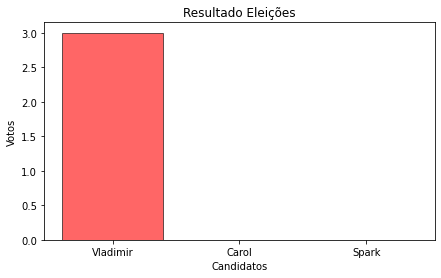

In [9]:
grafico1_Votos(lista_votacao)


Total dos votos por candidato

  Candidatos  Votos
0   Vladimir      3
1      Carol      0
2      Spark      0

Proporção de votos por candidato



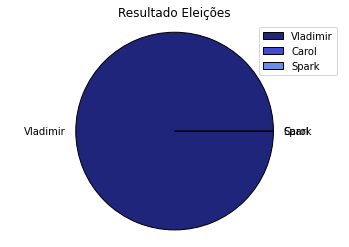

In [8]:
grafico2_Votos(lista_votacao)